<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lab-7:-Estimation-with-Loss-Functions" data-toc-modified-id="Lab-7:-Estimation-with-Loss-Functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lab 7: Estimation with Loss Functions</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Setup</a></span></li></ul></li><li><span><a href="#Loading-the-Tips-Dataset" data-toc-modified-id="Loading-the-Tips-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading the Tips Dataset</a></span></li><li><span><a href="#Question-1:-Defining-the-Model" data-toc-modified-id="Question-1:-Defining-the-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Question 1: Defining the Model</a></span></li><li><span><a href="#Loss-Functions" data-toc-modified-id="Loss-Functions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Loss Functions</a></span><ul class="toc-item"><li><span><a href="#Question-2a:-Implement-the-squared-loss-function" data-toc-modified-id="Question-2a:-Implement-the-squared-loss-function-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Question 2a: Implement the squared loss function</a></span></li><li><span><a href="#Question-2b:-Plotting-Squared-Loss" data-toc-modified-id="Question-2b:-Plotting-Squared-Loss-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Question 2b: Plotting Squared Loss</a></span></li><li><span><a href="#Question-2c:-Implement-the-absolute-loss" data-toc-modified-id="Question-2c:-Implement-the-absolute-loss-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Question 2c: Implement the absolute loss</a></span></li><li><span><a href="#Question-2d:-Plotting-Average-Loss-for-our-Data" data-toc-modified-id="Question-2d:-Plotting-Average-Loss-for-our-Data-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Question 2d: Plotting <strong>Average Loss</strong> for our Data</a></span></li></ul></li><li><span><a href="#Question-3:-Minimizing-The-Loss" data-toc-modified-id="Question-3:-Minimizing-The-Loss-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Question 3: Minimizing The Loss</a></span></li></ul></div>

# Lab 7: Estimation with Loss Functions


## Setup

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")
%matplotlib inline

# Loading the Tips Dataset

To begin with, we load the tips dataset from the `seaborn` library.  The tips data contains records of tips, total bill, and information about the person who paid the bill.

In [3]:
data = sns.load_dataset("tips")

print("Number of Records:", len(data))
data.head()

Number of Records: 244


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


---
<br></br>

# Question 1: Defining the Model 

Models attempt to estimate some population parameter using observed data. In this lab we will attempt to model the tip value (in dollars) as a function of the total bill.  As a consequence we define the following mathematical model:

$$\Large
\texttt{Tip} = \theta^*  \times \texttt{TotalBill}
$$

This follows the intuition that tips are some **unknown** percentage of the total bill.  We will then try to estimate the slope of this relationship which corresponds to the percent tip.

Here the parameter $\theta^*$ represents the true percent tip that we would like to estimate.  

**Implement the following function for this model:**


In [5]:
def model(theta, total_bill):
    """
    Takes the parameter theta and the total bill, and returns the computed tip.
    
    Parameters
    ----------
    theta: tip percentage 
    total_bill: total bill value in dollars
    """
    return theta * total_bill

---
<br/><br/><br/>

# Loss Functions

In class we covered a range of different loss functions.  In this lab we will implement the squared loss and the absolute loss functions.  
Suppose for a given total bill $x$, we observe a tip value of $y$ and our model predicts a tip value $\hat{y}$ by:
$$\Large
% the \hspace{0pt} is added to address a bug in safari mathjax
\hat{\hspace{0pt}y} = \theta x
$$ 
then any of the following might be appropriate **loss functions**

1. **Squared Loss** (also known as the $L^2$ loss pronounced "ell-two"):
$$\Large
% the \hspace{0pt} is added to address a bug in safari mathjax
L\left(y, \hat{\hspace{0pt}y} \right) = \left( y - \hat{\hspace{0pt}y} \right)^2
$$
1. **Absolute Loss** (also known as the $L^1$ loss pronounced "ell-one"):
$$\Large
% the \hspace{0pt} is added to address a bug in safari mathjax
L\left(y, \hat{\hspace{0pt}y} \right) = \left| y - \hat{\hspace{0pt}y} \right|
$$

---
<br></br>
In this question, you are going to define functions for **squared loss** and **absolute loss**. 

## Question 2a: Implement the squared loss function


$$\Large
L\left(y, \hat{\hspace{0pt}y} \right) = \left( y - \hat{\hspace{0pt}y} \right)^2
$$

Using the comments below, implement the squared loss function. Your answer should not use any loops.

<!--
BEGIN QUESTION
name: q2a
-->

In [7]:
def squared_loss(y_obs, y_hat):
    """
    Calculate the squared loss of the observed data and predicted data.
    
    Parameters
    ------------
    y_obs: an array of observed values
    y_hat: an array of predicted values
    
    Returns
    ------------
    An array of loss values corresponding to the squared loss for each prediction
    """
    return (y_obs - y_hat)**2

## Question 2b: Plotting Squared Loss

Suppose you observe a bill of \\$28 with a tip \\$3. (Does this tip look reasonable?)

In our model, this corresponds to $y=3.00$ and $x=28.00$. Now suppose we pick an initial range of $\theta$'s (tip percent in this case) for you. Use the `model` and `squared_loss` function defined above to plot the loss for a range of $\theta$ values:

In [9]:
y = 3.00
x = 28.00
thetas = np.linspace(0, 0.3, 200) # A range of theta values

## Finish this by replacing 0.0 with the correct calculation 
## Hint: You will use squared_loss y, model, theta and x
#loss should be a numpy array where the ith entry corresponds to the loss for the ith theta
loss = np.array([ squared_loss(y,model(theta,x)) for theta in thetas])

To test your loss calculation above, run the cell below, and it should produce this picture:

![squared loss](squared_loss.png)

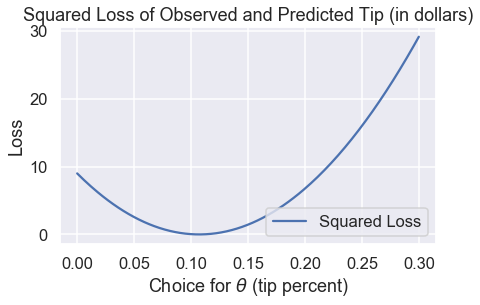

In [10]:
plt.plot(thetas, loss, label="Squared Loss")
plt.title("Squared Loss of Observed and Predicted Tip (in dollars)")
plt.xlabel(r"Choice for $\theta$ (tip percent)")
plt.ylabel(r"Loss")
plt.legend(loc=4)
plt.savefig("squared_loss_my_plot.png",  bbox_inches = 'tight')

## Question 2c: Implement the absolute loss 

$$\Large
L\left(y, \hat{\hspace{0pt}y} \right) = \left| y - \hat{\hspace{0pt}y} \right|
$$


In [12]:
def abs_loss(y_obs, y_hat):
    """
    Calculate the absolute loss of the observed data and predicted data.
    
    Parameters
    ------------
    y_obs: an array of observed values
    y_hat: an array of predicted values
    
    Returns
    ------------
    An array of loss values corresponding to the absolute loss for each prediction
    """
    return abs(y_obs - y_hat)

Below is the plot of the absolute loss.  If you implemented things correctly it should look like:

![absolute loss](absolute_loss.png)


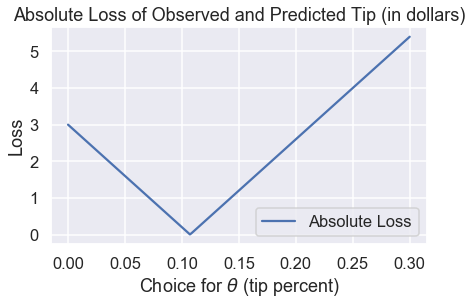

In [13]:
y = 3.00
x = 28.00
thetas = np.linspace(0, 0.3, 200) 

# Code provided for you this time. (you're welcome)
loss = np.array([abs_loss(y, model(theta,x)) for theta in thetas])

plt.plot(thetas, loss, label="Absolute Loss")
plt.title("Absolute Loss of Observed and Predicted Tip (in dollars)")
plt.xlabel(r"Choice for $\theta$ (tip percent)")
plt.ylabel(r"Loss")
plt.legend(loc=4)
plt.savefig("absolute_loss_my_plot.png",  bbox_inches = 'tight')


## Question 2d: Plotting **Average Loss** for our Data
Remember we define our model to be:
$$\Large
% the \hspace{0pt} is added to address a bug in safari mathjax
\hat{\hspace{0pt}y} = \theta x
$$ 
Now, we can extend the above loss functions to an entire dataset by taking the average. Let the dataset $\mathcal{D}$ be the set of observations:

$$\Large
\mathcal{D} = \{(x_1, y_1), \ldots, (x_n, y_n)\}
$$

where $x_i$ is the total bill and $y_i$ is the tip dollar amount.

We can define the average loss over the dataset as:

$$\Large
L\left(\theta, \mathcal{D}\right) = \frac{1}{n} \sum_{i=1}^n L(m_\theta(x_i), y_i) = \frac{1}{n} \sum_{i=1}^n L(\theta x_i, y_i) = \frac{1}{n} \sum_{i=1}^n L(\hat{y_i}, y_i)
$$

where $m_\theta(x_i) = \theta x_i = \hat{y_i}$ is the model evaluated using the parameters $\theta$ on the bill amount $x_i$.

**Complete the following code block to render a plot of the average absolute and squared loss for different values of $\theta$**

In [16]:
thetas = np.linspace(0, 0.3, 200) # A range of theta values
y = data['tip']
x = data['total_bill']

# Replace 0.0 with the correct value computed 
# Use the model and loss functions from above

# This time, each loss array should be a numpy array where the ith entry corresponds to the 
# average loss across all data points for the ith theta

avg_squared_loss = np.array([np.mean(squared_loss(y,model(theta,x))) for theta in thetas])
avg_absolute_loss = np.array([np.mean(abs_loss(y, model(theta,x))) for theta in thetas])


To test your loss calculations, run the cell below. If your code was correct, the following plot should look like:

![Average Loss](average_loss.png)

Note: Your colors might be different.

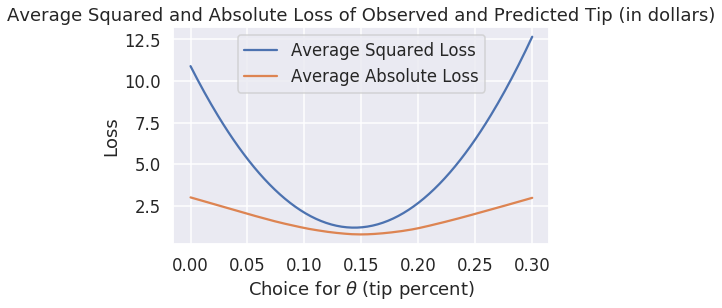

In [17]:
plt.plot(thetas, avg_squared_loss, label = "Average Squared Loss")
plt.plot(thetas, avg_absolute_loss, label = "Average Absolute Loss")
plt.title("Average Squared and Absolute Loss of Observed and Predicted Tip (in dollars)")
plt.xlabel(r"Choice for $\theta$ (tip percent)")
plt.ylabel(r"Loss")
plt.legend()
plt.savefig("average_loss_my_plot.png",  bbox_inches = 'tight')

**Based on the plot above, approximately what is the optimal value of theta you would choose for this model?**

In [18]:
q2d = "0.15" # answer question here as a string


---
<br/><br/><br/> 

# Question 3: Minimizing The Loss

In some cases, it is possible to use calculus to analytically compute the parameters $\theta$ that minimize the loss function.  However, in this lab we will use computational techniques to minimize the loss.  Here we will use the [`scipy.optimize.minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) routine to minimize the average loss.

Complete the following python function:


In [15]:
from scipy.optimize import minimize

def minimize_average_loss(loss_function, model, x, y):
    """
    Minimize the average loss calculated from using different thetas, and 
    find the estimation of theta for the model.
    
    Parameters
    ------------
    loss_function: A loss function, can be the squared or absolute loss function from above.
    model: A defined model function, here we use the model defined above
    x: the x values (total bills)
    y: the y values (tip amounts)
    
    Returns
    -----------
    The estimation for theta (tip percent) as a scalar
    
    Note we will ignore failed convergence for this lab ... 
    """
    
    ## Notes on the following function call which you need to finish:
    # 
    # 0. the ... should be replaced with the average loss evaluated on 
    #       the data x, y using the model and appropriate loss function
    # 1. x0 is the initial value for THETA.  Yes, this is confusing
    #       but people who write optimization libraries like to use x  
    #       as the variable name to optimize, not theta.
    
    return minimize(lambda theta: np.mean(loss_function(y,model(theta,x))), x0=0.0)['x'][0] # We extract 'x' entry in dict, which contains optimal theta